# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;







# Descripción del Proyecto:

Al operador de telecomunicaciones Interconnect le gustaría poder **pronosticar su tasa de cancelación de clientes**. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

# 0 Cargar Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter



## Análisis Exploratorio de los Datos

### Cargar DataFrames y mostrar su contenido

Sabemos que los archivos son 4 y del tipo csv, por lo tanto, el siguiente paso es analizarlos por separado para identificar si son consistentes entre sí. Luego, podremos responder una primera pregunta:

¿Es posible juntar la información de los 4 archivos en uno solo para su análisis?

In [2]:
# crear función para cargar un archivo de una ruta común.

path = "/datasets/final_provider/"

def load_df(path,string):
    df = pd.read_csv(path+string)
    
    return df

In [3]:
# cargar los 4 archivos de la ruta

df_contract = load_df(path,"contract.csv")
df_personal = load_df(path,"personal.csv")
df_internet = load_df(path,"internet.csv")
df_phone = load_df(path,"phone.csv")

In [4]:
# mostrar primeros datos de cada archivo más su información y descripción de los datos

list_df = [df_personal,df_contract,df_internet,df_phone]
list_string = ["CONTRACT","PERSONAL INFO", "INTERNET","PHONE"]

def df_info(list_df, list_string):
    idx = 0

    for df in list_df:

        print("*"*25,list_string[idx],"*"*25)
        
        display(df.head())
        print("-"*50)
        print(df.info())
        print("-"*50)
        display(df.describe())
        display(df.describe(include='object'))
        idx +=1


In [5]:
df_info(list_df, list_string)

************************* CONTRACT *************************


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None
--------------------------------------------------


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


,customerID,gender,Partner,Dependents
count,7043,7043,7043,7043
unique,7043,2,2,2
top,9347-AERRL,Male,No,No
freq,1,3555,3641,4933


************************* PERSONAL INFO *************************


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None
--------------------------------------------------


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043
unique,7043,77,5,3,2,4,6531
top,9347-AERRL,2014-02-01,No,Month-to-month,Yes,Electronic check,20.2
freq,1,366,5174,3875,4171,2365,11


************************* INTERNET *************************


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None
--------------------------------------------------


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,4373-VVHQL,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,4373-VVHQL,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


************************* PHONE *************************


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None
--------------------------------------------------


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,9347-AERRL,No
freq,1,3390


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,9347-AERRL,No
freq,1,3390


**Conclusiones:**

Se puede observar que los 4 dataframes contienen una característica en común, que corresponde al id de cada consumidor, `customerID`, el cual además contiene valores únicos. Por lo tanto, podemos combinar los 4 dataframes en uno solo para facilitar el análisis y posterior elaboración del modelo, ya que es el mismo nombre de columna en los 4.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<b>Éxito</b> - ¡Excelente trabajo en esta sección! Has abordado el análisis exploratorio de los datos de manera meticulosa y clara. La decisión de analizar los DataFrames por separado antes de fusionarlos es una buena práctica que asegura la integridad de los datos. Además, la identificación de customerID como la clave común entre los archivos demuestra un enfoque lógico y bien estructurado.

Continúa aplicando estas buenas prácticas en las próximas etapas del proyecto, especialmente durante la fusión de los DataFrames y la limpieza de datos. ¡Sigue así! 🚀

</div>










## Preprocesamiento de Datos

Preparar los datos para facilitar el posterior análisis y creación del modelo para las predicciones, revisar tipos de datos, valores ausentes, errores, entre otros.

### Combinar DataFrames con el método concat()

Conslidar los 4 archivos en un solo dataframe y mostrar sus datos para tener un visión más amplia del conjunto de datos.

In [6]:
# usar merge para unir los 4 dataframes en uno solo y revisar información

dfs = [df.set_index('customerID') for df in list_df]
df = pd.concat(dfs, axis=1, join='outer').reset_index()

df_info([df],['FUL DATAFRAME'])

************************* FUL DATAFRAME *************************


,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,No


--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   BeginDate         7043 non-null   object 
 6   EndDate           7043 non-null   object 
 7   Type              7043 non-null   object 
 8   PaperlessBilling  7043 non-null   object 
 9   PaymentMethod     7043 non-null   object 
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   obje

,SeniorCitizen,MonthlyCharges
count,7043.000000,7043.000000
mean,0.162147,64.761692
std,0.368612,30.090047
min,0.000000,18.250000
25%,0.000000,35.500000
50%,0.000000,70.350000
75%,0.000000,89.850000
max,1.000000,118.750000


,customerID,gender,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,5517,5517,5517,5517,5517,5517,5517,6361
unique,7043,2,2,2,77,5,3,2,4,6531,2,2,2,2,2,2,2,2
top,9347-AERRL,Male,No,No,2014-02-01,No,Month-to-month,Yes,Electronic check,20.2,Fiber optic,No,No,No,No,No,No,No
freq,1,3555,3641,4933,366,5174,3875,4171,2365,11,3096,3498,3088,3095,3473,2810,2785,3390


In [7]:
# revisar los valores de las variables categóricas

i = 0
dfs = df.drop(columns='customerID',axis=1)

for col in dfs.columns:
    
    print("*"*25,dfs.columns[i],"*"*25)
    display(dfs[col].sort_values().unique())
    i += 1
    print('\n')

************************* gender *************************


array(['Female', 'Male'], dtype=object)



************************* SeniorCitizen *************************


array([0, 1])



************************* Partner *************************


array(['No', 'Yes'], dtype=object)



************************* Dependents *************************


array(['No', 'Yes'], dtype=object)



************************* BeginDate *************************


array(['2013-10-01', '2013-11-01', '2013-12-01', '2014-01-01',
       '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01',
       '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01',
       '2014-10-01', '2014-11-01', '2014-12-01', '2015-01-01',
       '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01',
       '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01',
       '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
       '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',
       '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01',
       '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01',
       '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
       '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
       '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
       '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
       '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
       '2018-10-01', '2018-11-01', '2018-12-01', '2019-



************************* EndDate *************************


array(['2019-10-01 00:00:00', '2019-11-01 00:00:00',
       '2019-12-01 00:00:00', '2020-01-01 00:00:00', 'No'], dtype=object)



************************* Type *************************


array(['Month-to-month', 'One year', 'Two year'], dtype=object)



************************* PaperlessBilling *************************


array(['No', 'Yes'], dtype=object)



************************* PaymentMethod *************************


array(['Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check'], dtype=object)



************************* MonthlyCharges *************************


array([ 18.25,  18.4 ,  18.55, ..., 118.6 , 118.65, 118.75])



************************* TotalCharges *************************


array([' ', '100.2', '100.25', ..., '999.45', '999.8', '999.9'],
      dtype=object)



************************* InternetService *************************


array(['DSL', 'Fiber optic', nan], dtype=object)



************************* OnlineSecurity *************************


array(['No', 'Yes', nan], dtype=object)



************************* OnlineBackup *************************


array(['No', 'Yes', nan], dtype=object)



************************* DeviceProtection *************************


array(['No', 'Yes', nan], dtype=object)



************************* TechSupport *************************


array(['No', 'Yes', nan], dtype=object)



************************* StreamingTV *************************


array(['No', 'Yes', nan], dtype=object)



************************* StreamingMovies *************************


array(['No', 'Yes', nan], dtype=object)



************************* MultipleLines *************************


array(['No', 'Yes', nan], dtype=object)

Ahora podemos empezar a realizar la limpieza, si es necesario, del DataFrame consolidado con toda la información de los clientes de Interconnect.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<b>Éxito</b> - ¡Gran trabajo consolidando los DataFrames en uno solo! El uso de pd.concat() para fusionar los datos demuestra un entendimiento sólido de las herramientas de Pandas. Además, verificar los valores únicos de las columnas categóricas es una excelente práctica para identificar posibles inconsistencias o valores anómalos antes de proceder con la limpieza de datos. Este enfoque te permitirá abordar cualquier problema de calidad de datos de manera proactiva. ¡Muy bien hecho! 🎉

</div>

### Cambiar Tipo de Datos

La columna `BeginDate` y `EndDate` deberían ser del tipo `date` y la columna `TotalCharges` debería ser del tipo `float`.

Entonces, primero se corregirá la columna `EndDate`, ya que contiene valores de fechas y 'No', por lo que se debe reemplazar los 'No' por vacíos para poder cambiar el tipo de datos a `Date`.

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,No


In [9]:
# reemplazar los valores 'No' por vacíos en la columna 'EndDate' y comprobar

df['EndDate'] = df['EndDate'].replace(to_replace='No', value=np.nan)
df['EndDate'].unique()

array([nan, '2019-12-01 00:00:00', '2019-11-01 00:00:00',
       '2019-10-01 00:00:00', '2020-01-01 00:00:00'], dtype=object)

In [10]:
# cambiar tipo de datos de las columnas 'BeginDate' and 'EndDate' y comprobar

df[['BeginDate','EndDate']] = df[['BeginDate','EndDate']].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   gender            7043 non-null   object        
 2   SeniorCitizen     7043 non-null   int64         
 3   Partner           7043 non-null   object        
 4   Dependents        7043 non-null   object        
 5   BeginDate         7043 non-null   datetime64[ns]
 6   EndDate           1869 non-null   datetime64[ns]
 7   Type              7043 non-null   object        
 8   PaperlessBilling  7043 non-null   object        
 9   PaymentMethod     7043 non-null   object        
 10  MonthlyCharges    7043 non-null   float64       
 11  TotalCharges      7043 non-null   object        
 12  InternetService   5517 non-null   object        
 13  OnlineSecurity    5517 non-null   object        
 14  OnlineBackup      5517 n

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>
<b>Éxito</b> - ¡Excelente trabajo en esta sección de preprocesamiento de datos! Has identificado correctamente las columnas que necesitaban un cambio en su tipo de datos y manejado de manera adecuada los valores inconsistentes en la columna EndDate. El uso de np.nan para reemplazar los valores 'No' y el posterior cambio del tipo de datos a datetime64[ns] muestra un manejo sólido de las herramientas de limpieza de datos en Pandas. 

Listo, ahora falta corregir el tipo de datos de la columna `TotalCharges`. Para esto, primero hay que cambiar los string vacíos por 0 ó Nan. por ahora lo dejaremos como 0 para evitar valores nulos.

In [11]:
# cambiar vacíos por '0' y el tipo de datos a 'float' de la columna 'TotalCharges'

df['TotalCharges'] = df['TotalCharges'].replace(to_replace=' ',value=np.nan).astype('float')
print(df['TotalCharges'].sort_values().unique())
print('\n')
df.info()

[  18.8    18.85   18.9  ... 8672.45 8684.8      nan]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   gender            7043 non-null   object        
 2   SeniorCitizen     7043 non-null   int64         
 3   Partner           7043 non-null   object        
 4   Dependents        7043 non-null   object        
 5   BeginDate         7043 non-null   datetime64[ns]
 6   EndDate           1869 non-null   datetime64[ns]
 7   Type              7043 non-null   object        
 8   PaperlessBilling  7043 non-null   object        
 9   PaymentMethod     7043 non-null   object        
 10  MonthlyCharges    7043 non-null   float64       
 11  TotalCharges      7032 non-null   float64       
 12  InternetService   5517 non-null   object        
 13  OnlineSecurity    5517

<div class="alert alert-block alert-warning"> <b>Comentario del revisor</b> <a class="tocSkip"></a>
<b>Atención</b> ⚠️ - Gran trabajo en identificar y manejar los valores vacíos en la columna TotalCharges. Cambiar los valores vacíos por NaN es una buena práctica para evitar errores en operaciones numéricas posteriores. El cambio del tipo de datos a float facilita el análisis estadístico y garantiza la consistencia en los cálculos.

Una pequeña mejora que podrías considerar es evaluar si es más adecuado reemplazar los valores vacíos por NaN en lugar de 0, dependiendo del contexto del análisis. Esto podría ser relevante si los valores faltantes indican un dato no disponible en lugar de un verdadero cero. Además, considera analizar cómo los valores de TotalCharges están distribuidos para validar si estos cambios afectan a la integridad del conjunto de datos.

¡Sigue así, estás en el camino correcto!

### Gestionar Valores Nulos

Luego de corregir los tipos de datos en el ejercicio anterior, ahora hay que analizar los valores nulos en cada una de las variables y decidir si se reemplazan o si se eliminan.

**Observaciones**

1. `EndDate`: está bien que tenga valores vacíos, ya que indica que el cliente aún tiene contrato vigente.
2. `TotalCharges`: solo tiene 11 valores nulos, por lo que se reemplazarán por la media.
3. El resto de variables con valores nulos, corresponden a variables categóricas del tipo binarias, con valores 'Si' o 'No'. por lo que será necesario analizar las relaciones con las otras variables y deciidr si se reemplazarán o eliminarán.

In [12]:
# reemplazar valores nulos en 'TotalCharges' por la media y comprobar la ausencia de valores nulos

mean_charges = df['TotalCharges'].mean()
df['TotalCharges'] = df['TotalCharges'].replace(to_replace=np.nan, value=mean_charges)
df['TotalCharges'].isna().sum()

0

Revisar la frecuencia de los valores de cada variable categórica binaria.

In [13]:
# identificar las variables categóricas con valores nulos y mostrar la frecuencia de sus valores

list_na = []

for col in df.select_dtypes('object').columns:
    
    if df[col].isna().sum() > 0:
        list_na.append(df[col])
        print(col)
        print('Nulos: ',df[col].isna().sum())
        print(df[col].value_counts(dropna=False,normalize=True).apply(lambda x: f'{x: .0%}'))
        print('\n')

InternetService
Nulos:  1526
Fiber optic     44%
DSL             34%
NaN             22%
Name: InternetService, dtype: object


OnlineSecurity
Nulos:  1526
No      50%
Yes     29%
NaN     22%
Name: OnlineSecurity, dtype: object


OnlineBackup
Nulos:  1526
No      44%
Yes     34%
NaN     22%
Name: OnlineBackup, dtype: object


DeviceProtection
Nulos:  1526
No      44%
Yes     34%
NaN     22%
Name: DeviceProtection, dtype: object


TechSupport
Nulos:  1526
No      49%
Yes     29%
NaN     22%
Name: TechSupport, dtype: object


StreamingTV
Nulos:  1526
No      40%
Yes     38%
NaN     22%
Name: StreamingTV, dtype: object


StreamingMovies
Nulos:  1526
No      40%
Yes     39%
NaN     22%
Name: StreamingMovies, dtype: object


MultipleLines
Nulos:  682
No      48%
Yes     42%
NaN     10%
Name: MultipleLines, dtype: object




En general, los clientes NO contratan servicios adicionales, pero no sería correcto reemplazar los valores nulos por 'No', porque los valores quedarían desequilibrados, y tampoco se pueden eliminar, ya que representan el 20% del dataframe y se perderían muchos datos pensando en el modelo de predicción.

<div class="alert alert-block alert-warning"> <b>Comentario del revisor</b> <a class="tocSkip"></a>
<b>Atención</b> ⚠️ - Buen trabajo al gestionar los valores nulos en TotalCharges reemplazándolos por la media, ya que preserva los datos para el análisis. Considera asignar una categoría como "Desconocido" a los valores nulos en las variables categóricas binarias para mantener consistencia y evitar pérdida de datos importantes.

¡Estás haciendo un gran trabajo, sigue así! 🚀

Como no se ve una relación entre las variables que determine si las variables son 'Si' o 'No' y, además, tienen frecuencias similares, vamos a reemplazarlos por valores al azar, asumiendo que la información no se proceso correctamente.

In [14]:
# reemplazar los valores nulos de cada columna por un valor al azar entre sus valores únicos

for col in list_na:
    col = col.apply(
        lambda x: np.random.choice(col.dropna().unique()) if pd.isna(x) else x
    )
    df[col.name] = col
    print(col.name,col.count())
    print(col.value_counts(dropna=False,normalize=True).apply(lambda x: f'{x: .0%}'))
    print('-'*25,'\n')


InternetService 7043
Fiber optic     55%
DSL             45%
Name: InternetService, dtype: object
------------------------- 

OnlineSecurity 7043
No      60%
Yes     40%
Name: OnlineSecurity, dtype: object
------------------------- 

OnlineBackup 7043
No      55%
Yes     45%
Name: OnlineBackup, dtype: object
------------------------- 

DeviceProtection 7043
No      55%
Yes     45%
Name: DeviceProtection, dtype: object
------------------------- 

TechSupport 7043
No      60%
Yes     40%
Name: TechSupport, dtype: object
------------------------- 

StreamingTV 7043
No      50%
Yes     50%
Name: StreamingTV, dtype: object
------------------------- 

StreamingMovies 7043
No      50%
Yes     50%
Name: StreamingMovies, dtype: object
------------------------- 

MultipleLines 7043
No      53%
Yes     47%
Name: MultipleLines, dtype: object
------------------------- 



In [15]:
# comprobemos los resultados

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   gender            7043 non-null   object        
 2   SeniorCitizen     7043 non-null   int64         
 3   Partner           7043 non-null   object        
 4   Dependents        7043 non-null   object        
 5   BeginDate         7043 non-null   datetime64[ns]
 6   EndDate           1869 non-null   datetime64[ns]
 7   Type              7043 non-null   object        
 8   PaperlessBilling  7043 non-null   object        
 9   PaymentMethod     7043 non-null   object        
 10  MonthlyCharges    7043 non-null   float64       
 11  TotalCharges      7043 non-null   float64       
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

Ahora si tenemos nuestro dataframe limpio, sin valores nulos, excepto por la columna `EndDate`, la cual, como ya se dijo, está bien, ya que indica si un cliente se ha ido o no.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>
<b>Éxito</b> - ¡Excelente decisión y ejecución al reemplazar los valores nulos de las variables categóricas con valores al azar dentro de sus categorías! Este enfoque asegura que el balance de frecuencias se mantenga y evita introducir sesgos en el análisis. También es positivo haber justificado la permanencia de los nulos en la columna EndDate.

Con el dataframe limpio y listo para el análisis, ahora puedes proceder a explorar relaciones más profundas y avanzar hacia los objetivos del proyecto. ¡Sigue adelante con este gran ritmo! 🚀😊

</div>

### Crear Columnas pensando en el Modelo

Lo último que resta por hacer, es crear las columnas que sean necesarias pensando en el modelo de predicción. Para eso, también es importante identificar nuestra variable objetivo, la cual corresponde a la columna `EndDate`, ya que indica la fecha en la que un cliente terminó el contrato. Como esta variable es del tipo `Date`, debemos crear una nueva columna con valores 0 ó 1.

- 0: si el cliente 'NO' ha terminado contrato, es decir, no tiene fecha en la columna `EndDate`
- 1: si el cliente 'SI' terminó contrato, es decir, sí tiene una fecha en la columna `EndDate`

In [16]:
# crear columna a partir de la columna 'EndDate'

df['Quit'] = df['EndDate'].apply(lambda x: 0 if pd.isna(x) else 1)
df['Quit'].unique()

array([0, 1])

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,...,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Quit
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,NaT,Month-to-month,Yes,Electronic check,...,29.85,DSL,No,Yes,No,No,No,No,No,0
1,5575-GNVDE,Male,0,No,No,2017-04-01,NaT,One year,No,Mailed check,...,1889.50,DSL,Yes,No,Yes,No,No,No,No,0
2,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,...,108.15,DSL,Yes,Yes,No,No,No,No,No,1
3,7795-CFOCW,Male,0,No,No,2016-05-01,NaT,One year,No,Bank transfer (automatic),...,1840.75,DSL,Yes,No,Yes,Yes,No,No,No,0
4,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,...,151.65,Fiber optic,No,No,No,No,No,No,No,1


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>
<b>Éxito</b> - ¡Excelente trabajo al crear la columna Quit como variable objetivo! La transformación lógica de la columna EndDate para diferenciar entre clientes que han terminado contrato y los que no es un enfoque claro y efectivo para el modelo de predicción. Este paso es crucial para estructurar el problema como un modelo de clasificación binaria, lo cual facilitará la implementación de algoritmos.

Tu preparación hasta ahora es sólida, y estás en un excelente punto de partida para construir y evaluar tu modelo predictivo. ¡Adelante con este gran esfuerzo! 🚀😊

</div>

### Cambiar las variables binarias por 0s y 1s

Como se puede observar, la gran mayoría de las variables son binarias, del tipo 'Yes' or 'No', por lo tanto, para terminar la preparación de los datos y pensando en el modelo de predicción, será necesario, reemplazar todos los valores 'Yes' or 'No' por 1 y 0, respectivamente.

In [18]:
# primero hay que identificar cuáles son estas variables

list_binary = []

for col in df.columns:
    if 'Yes' in df[col].unique():
        list_binary.append(col)
print(list_binary)

['Partner', 'Dependents', 'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']


In [19]:
# reemplazar valores 'Yes' o 'No' por 1 y 0, respectivamente

for li in list_binary:
    df[li] = df[li].apply(lambda x: 1 if x=='Yes' else 0)

También se puede aplicar algo similar a la columna `gender`, ya que solo toma 2 valores posibles, `Female` y `Male`, por lo tanto, dejaremos Female = 0 y Male = 1.

In [20]:
# cambiar columna gender, female = 0 y male = 1

df['gender'] = df['gender'].apply(lambda x: 1 if x=='Male' else 0)

Y por último, aplicamos lo mismo a la columna `InternetService`, donde DSL = 0 y Fiber optic = 1.

In [21]:
# cambiar columna gender, DSL = 0 y Fiber optic = 1

df['InternetService'] = df['InternetService'].apply(lambda x: 1 if x=='DSL' else 0)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,...,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Quit
0,7590-VHVEG,0,0,1,0,2020-01-01,NaT,Month-to-month,1,Electronic check,...,29.85,1,0,1,0,0,0,0,0,0
1,5575-GNVDE,1,0,0,0,2017-04-01,NaT,One year,0,Mailed check,...,1889.50,1,1,0,1,0,0,0,0,0
2,3668-QPYBK,1,0,0,0,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,...,108.15,1,1,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,2016-05-01,NaT,One year,0,Bank transfer (automatic),...,1840.75,1,1,0,1,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2019-09-01,2019-11-01,Month-to-month,1,Electronic check,...,151.65,0,0,0,0,0,0,0,0,1


Ahora sí, ya quedó corregido el dataframe, lo cual permite analizar sus datos mediante gráficos para identificar posibles relaciones entre ellas.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>
<b>Éxito</b> - ¡Felicidades! Has realizado una excelente transformación de las variables binarias. Cambiar los valores 'Yes' y 'No' por 1 y 0 es un paso clave para preparar el dataset de manera adecuada para el modelo de predicción. Este enfoque mejora la eficiencia del modelo y estandariza las variables, facilitando su análisis posterior.

## Análisis de los Datos

Primero, hay que separar el dataframe en los 2 grupos de interés de la variable `Quit` para analizar, también, su comportamiento y relaciones por separado.

In [22]:
# separar dataframe en 2 grupos, clientes activos y clientes inactivos

df_quit = df[df['Quit']==1]
df_active = df[df['Quit']==0]

### Analizar las fechas en las que los clientes iniciaron su contrato y terminaron su contrato.

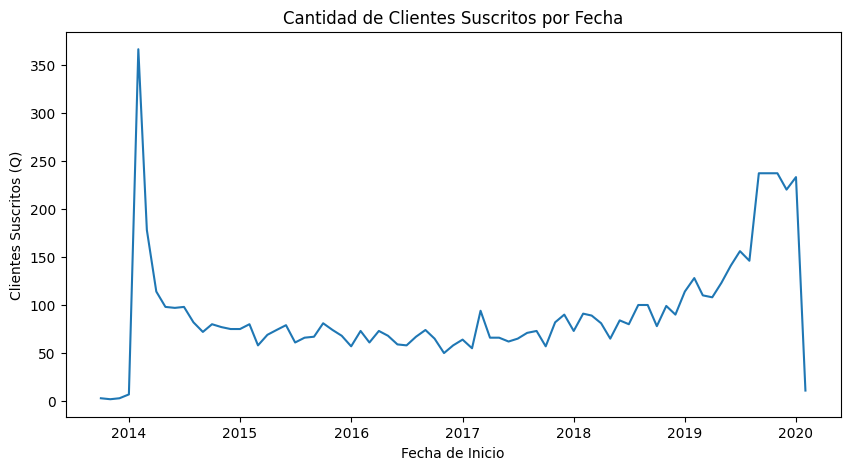

In [23]:
# graficar 'BeginDate' por cliente

plt.figure(figsize=(10,5))
plt.plot(pd.pivot_table(df,values='customerID',index='BeginDate',aggfunc='count'))
plt.title('Cantidad de Clientes Suscritos por Fecha')
plt.xlabel('Fecha de Inicio')
plt.ylabel('Clientes Suscritos (Q)')
plt.show()

<Figure size 500x500 with 0 Axes>

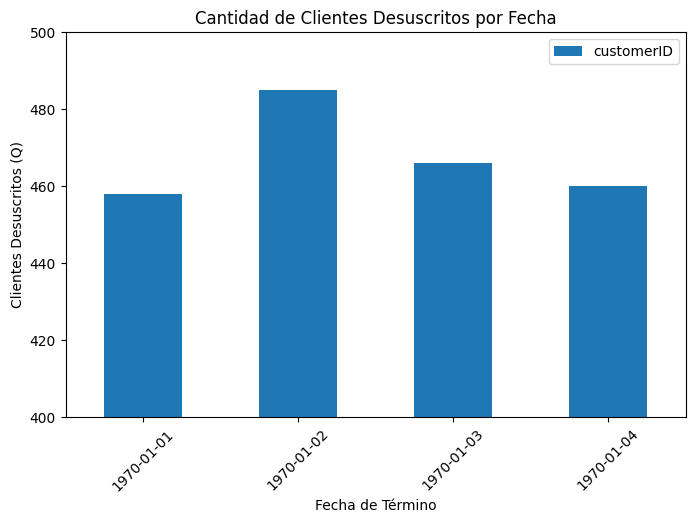

In [24]:
# graficar 'EndDate' por cliente

plt.figure(figsize=(5,5))
pd.pivot_table(df,values='customerID',index='EndDate',aggfunc='count').plot(kind='bar',figsize=(8,5))

date_format = DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.title('Cantidad de Clientes Desuscritos por Fecha')
plt.xlabel('Fecha de Término')
plt.ylabel('Clientes Desuscritos (Q)')

plt.xticks(rotation=45)
plt.ylim(400,500)

plt.show()

**Observaciones**

El gráfico muestra un gran número de suscripciones durante los primeros meses del 2015 y luego cae abruptamente, probablemente por el lanzamiento, pero en los próximos años se observa una leve tendencia al alza hasta el 2019.

En cuanto a las desuscripciones, se realizaron entre oct-2019 y ene-2020, es decir, durante los ultimos 4 meses de los datos y en proporciones similares.

### Analizar relación de montos cobrados  por Fecha de Suscripción y según grupo de cliente

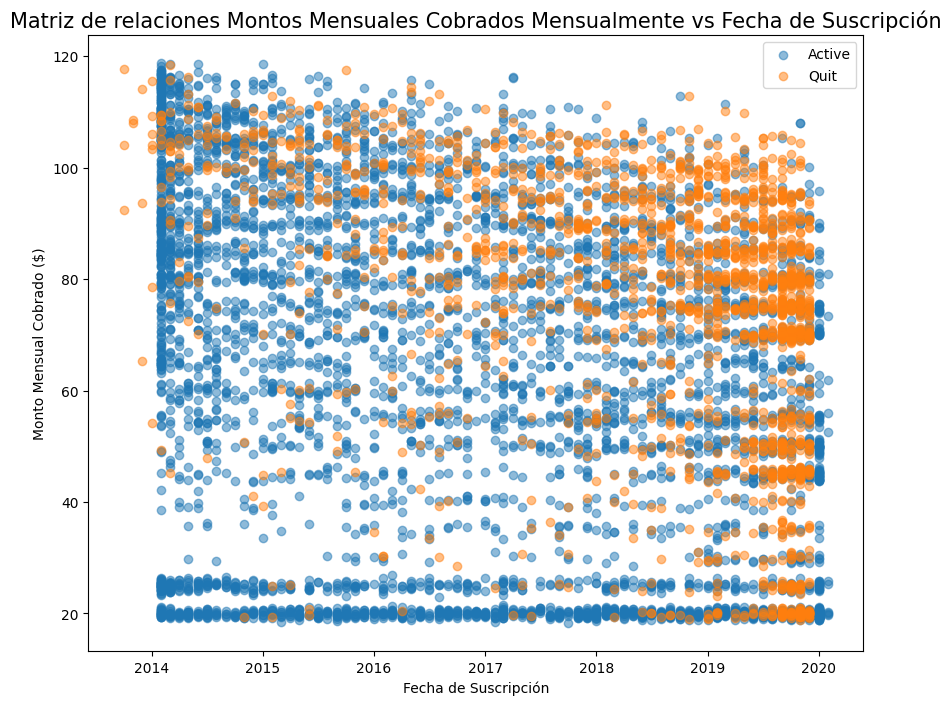

In [25]:
# montos cobrados por cliente y por fecha según grupo activo o inactivo

plt.figure(figsize=(10,8))

plt.scatter(df_active['BeginDate'],df_active['MonthlyCharges'],label='Active',alpha=0.5)
plt.scatter(df_quit['BeginDate'],df_quit['MonthlyCharges'],label='Quit',alpha=0.5)

plt.title('Matriz de relaciones Montos Mensuales Cobrados Mensualmente vs Fecha de Suscripción',fontsize=15)
plt.xlabel('Fecha de Suscripción')
plt.ylabel('Monto Mensual Cobrado ($)')
plt.legend()

plt.show()

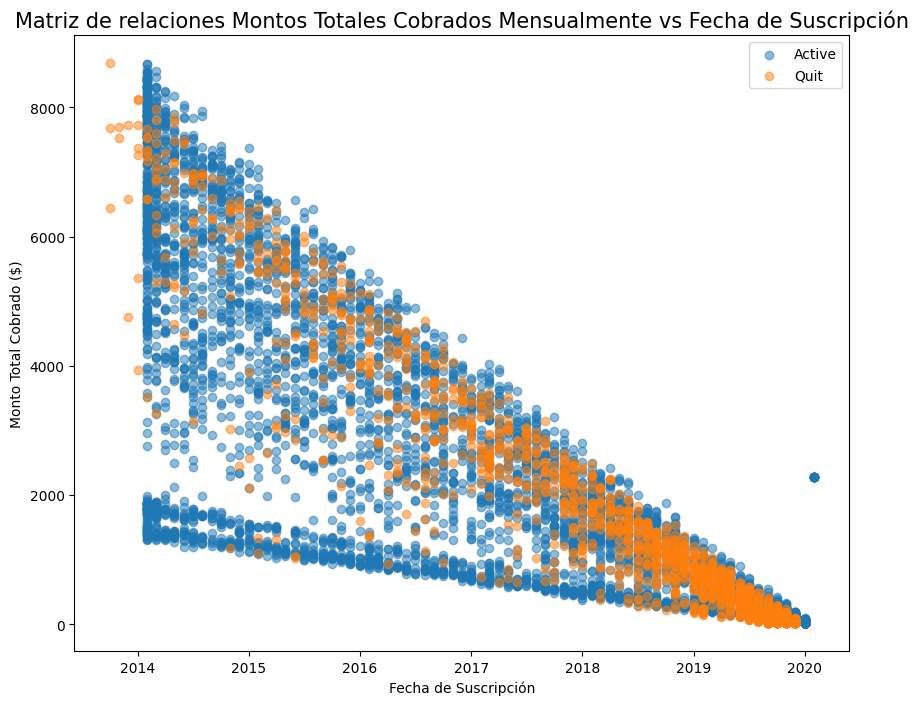

In [26]:
# montos totales cobrados por cliente y por fecha según grupo activo o inactivo

plt.figure(figsize=(10,8))

plt.scatter(df_active['BeginDate'],df_active['TotalCharges'],label='Active',alpha=0.5)
plt.scatter(df_quit['BeginDate'],df_quit['TotalCharges'],label='Quit',alpha=0.5)

plt.title('Matriz de relaciones Montos Totales Cobrados Mensualmente vs Fecha de Suscripción',fontsize=15)
plt.xlabel('Fecha de Suscripción')
plt.ylabel('Monto Total Cobrado ($)')
plt.legend()

plt.show()

**Observaciones**

Se puede observar que los clientes que terminaron contrato, por un lado, eran en su mayoría clientes nuevos que estuvieron algunos meses vigentes antes de terminar contrato, lo cual llama la atención y vale la pena cuestionar para proponer estrategias de marketing, servicio al cliente, promociones, etc, para retener a los clientes.

Además, se ve que los que terminaron contrato, estaban pagando precios mensuales bastante altos, lo cual puede significar que no estaban de acuerdo con la razón precio/calidad de los servicios que les ofrecieron.



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

<b>Éxito</b> - Excelente visualización para analizar las tendencias de suscripciones de clientes. Identificar picos y caídas en las suscripciones iniciales, como el aumento en 2015, es fundamental para entender el comportamiento de los usuarios en relación con eventos clave como lanzamientos o estrategias comerciales. Este enfoque te ayudará a extraer conclusiones relevantes para el análisis del comportamiento del cliente. ¡Buen trabajo! 🚀

### Analizar la relación del género con los clientes que se desuscribieron

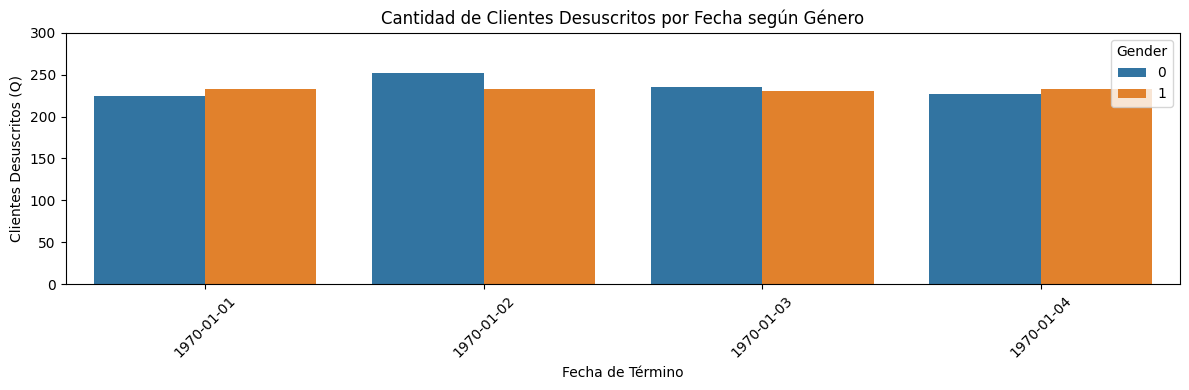

In [27]:
# graficar las desuscripciones por fecha

grouped_data = df.groupby(['EndDate','gender']).size().reset_index(name='Count')
grouped_data['EndDate'] = pd.to_datetime(grouped_data['EndDate'])

plt.figure(figsize=(12,4))
sb.barplot(data=grouped_data,x='EndDate',y='Count',hue='gender')

date_format = DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

plt.title('Cantidad de Clientes Desuscritos por Fecha según Género')
plt.xlabel('Fecha de Término')
plt.ylabel('Clientes Desuscritos (Q)')
plt.xticks(rotation=45)
plt.ylim(0,300)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [28]:
# desuscripciones totales por género

df.groupby(['gender'])['Quit'].sum()

gender
0    939
1    930
Name: Quit, dtype: int64

**Observaciones**

Este gráfico nos muestra que las desuscripciones se realizaron en los últimos 4 meses, en proporciones similares, tanto en meses como por género.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>
<b>Éxito</b> - Muy buen trabajo al realizar una visualización clara y específica de las desuscripciones según género y fecha. La segmentación por género aporta un nivel adicional de análisis que es muy valioso para entender patrones de comportamiento en la desuscripción. Además, el uso del formato de fechas y límites en los ejes facilita la lectura del gráfico. Este tipo de visualizaciones son fundamentales para identificar tendencias y tomar decisiones estratégicas. ¡Continúa explorando patrones de datos como este! 🚀

</div>

### Buscar valores atípicos en las columnas `MonthlyCharges` y `TotalCharges`.

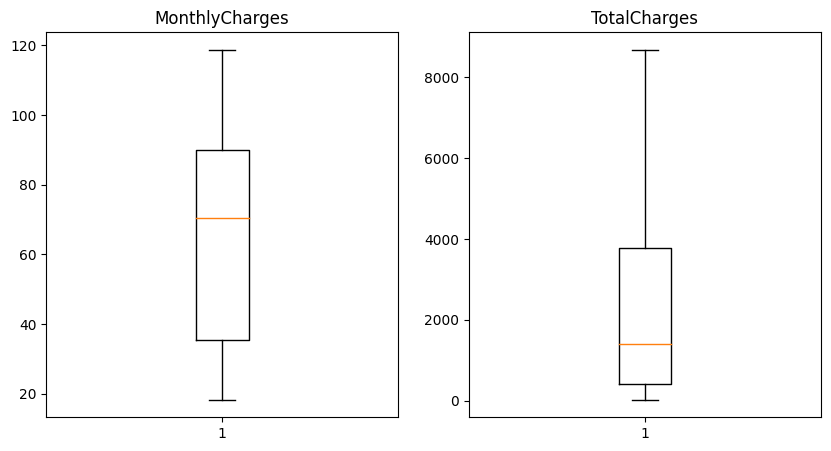

In [29]:
# valores atípicos

fig, axs = plt.subplots(1,2,figsize=(10,5))

axs[0].boxplot(df['MonthlyCharges'])
axs[0].set_title('MonthlyCharges')

axs[1].boxplot(df['TotalCharges'])
axs[1].set_title('TotalCharges')

plt.show()

No parecieran haber valores atípicos en estas variables.

### Analizar relaciones entre las variables con Scatter_Matrix

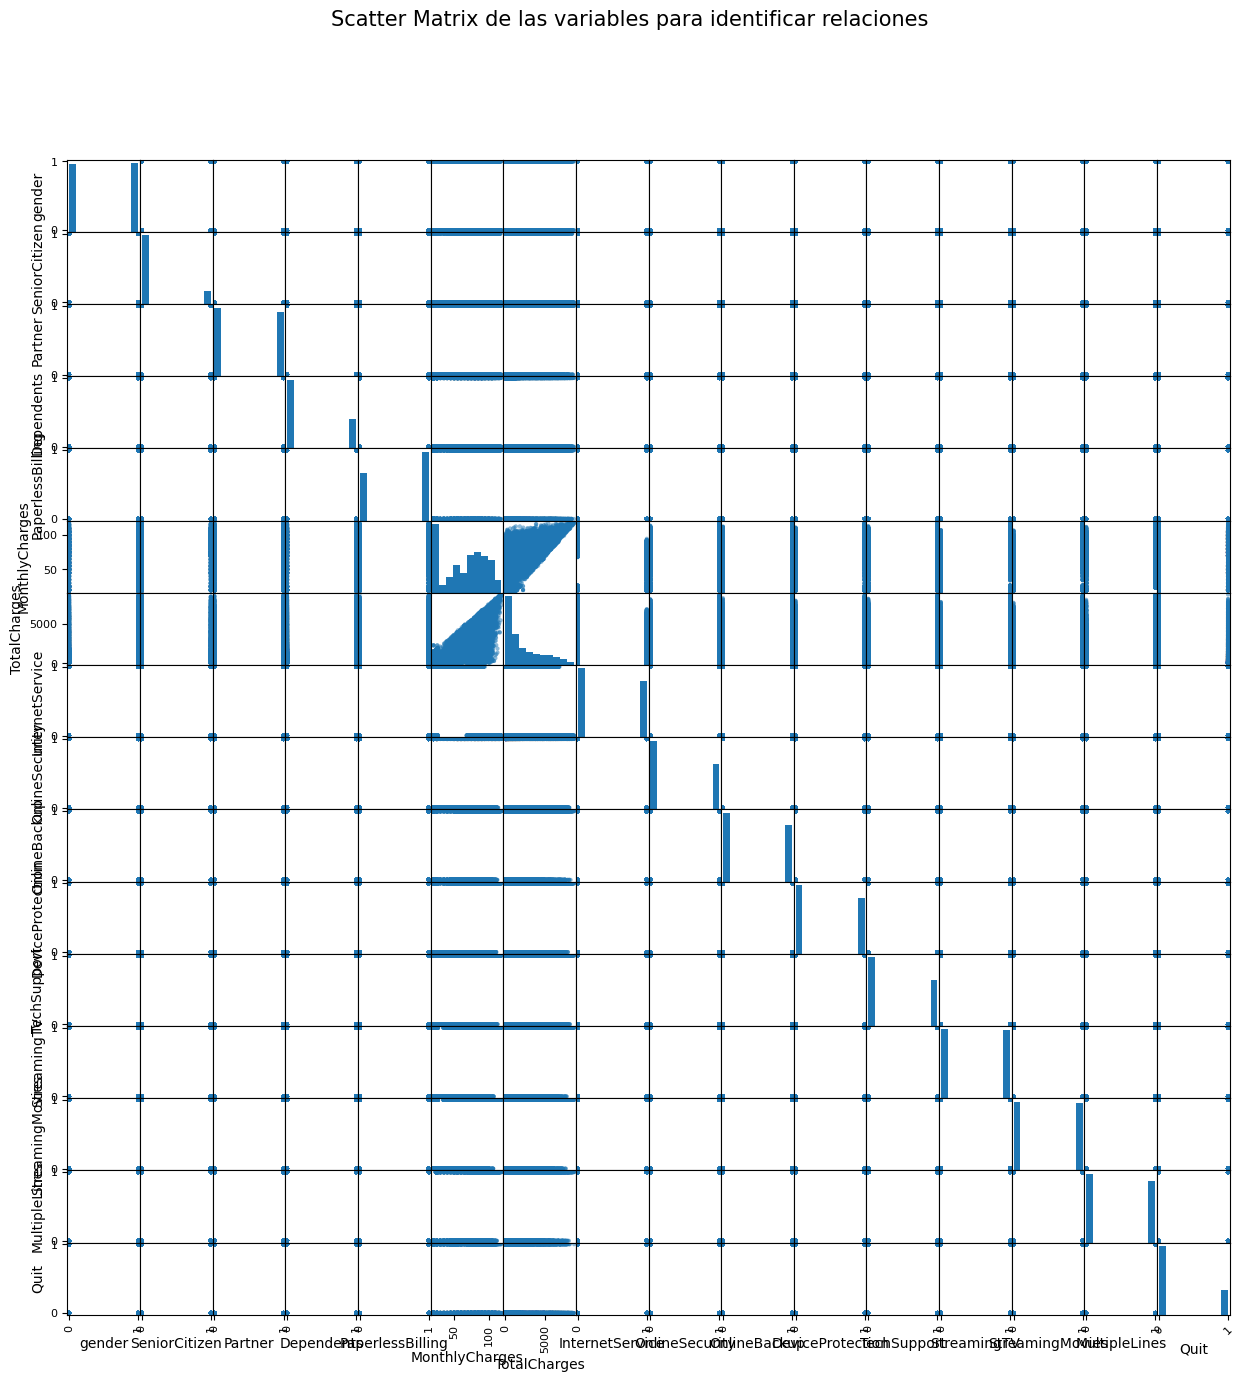

In [30]:
# scatter matrix del dataframe

pd.plotting.scatter_matrix(df,figsize=(15,15),diagonal='hist')
plt.xticks(rotation=45)

plt.suptitle('Scatter Matrix de las variables para identificar relaciones',size=15)
plt.show()

La matriz de relaciones muestra que hay muchas variables que no aportan mucha información, siendo las más relevantes, las variables `MonthlyCarges` y `TotalCharges`. Más adelante, se evaluará si es necesario eliminar algunas variables para alivianar el dataframe.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>
<b>Éxito</b> - Muy buen trabajo al utilizar una scatter matrix para explorar las relaciones entre variables. Este tipo de análisis es esencial para identificar correlaciones potenciales y variables que puedan aportar valor al modelo predictivo. La observación sobre las variables MonthlyCharges y TotalCharges como posibles influencias clave es un buen enfoque para enfocar el análisis y optimizar el modelo. ¡Sigue adelante con este excelente nivel de detalle en tus análisis! 🚀

</div>

Analizar la distribución de las variables principales `MonthlyCharges` y `TotalCharges`.

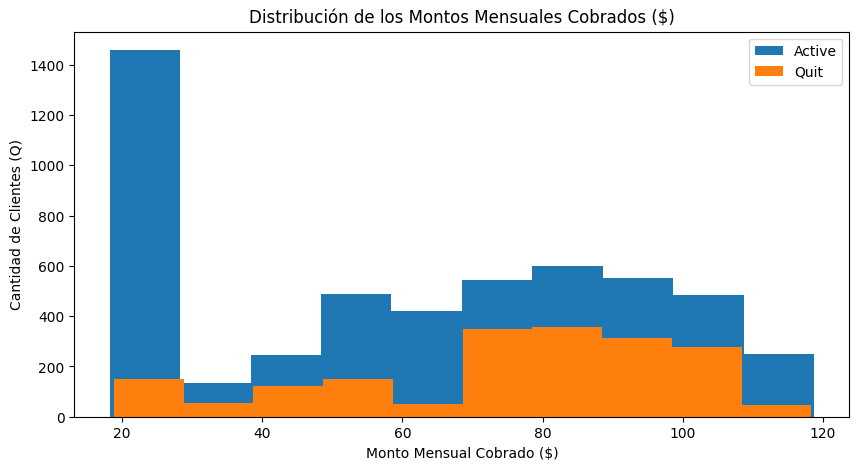

In [31]:
# distribución de los montos mensuales cobrados

plt.figure(figsize=(10,5))
plt.hist(df_active['MonthlyCharges'],bins=10,label='Active')
plt.hist(df_quit['MonthlyCharges'],bins=10,label='Quit')

plt.title('Distribución de los Montos Mensuales Cobrados ($)')
plt.xlabel('Monto Mensual Cobrado ($)')
plt.ylabel('Cantidad de Clientes (Q)')
plt.legend()

plt.show()


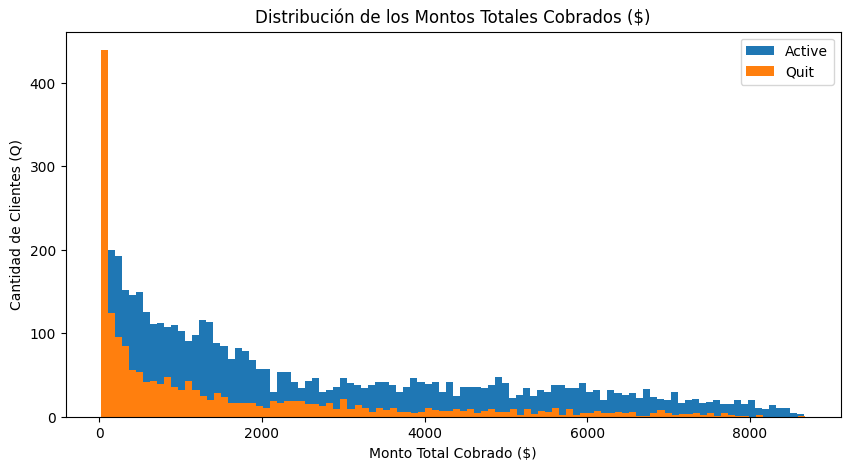

In [32]:
# distribución de los montos totales cobrados

plt.figure(figsize=(10,5))
plt.hist(df_active['TotalCharges'],bins=100,label='Active')
plt.hist(df_quit['TotalCharges'],bins=100,label='Quit')

plt.title('Distribución de los Montos Totales Cobrados ($)')
plt.xlabel('Monto Total Cobrado ($)')
plt.ylabel('Cantidad de Clientes (Q)')
plt.legend()

plt.show()


**Observaciones**

Se observa por un lado, que la mayoría de los clientes activos tienen planes más baratos que los clientes que terminaron contrato, por lo que, definitivamente, los precios si influyen en la decisión de terminar el contrato.

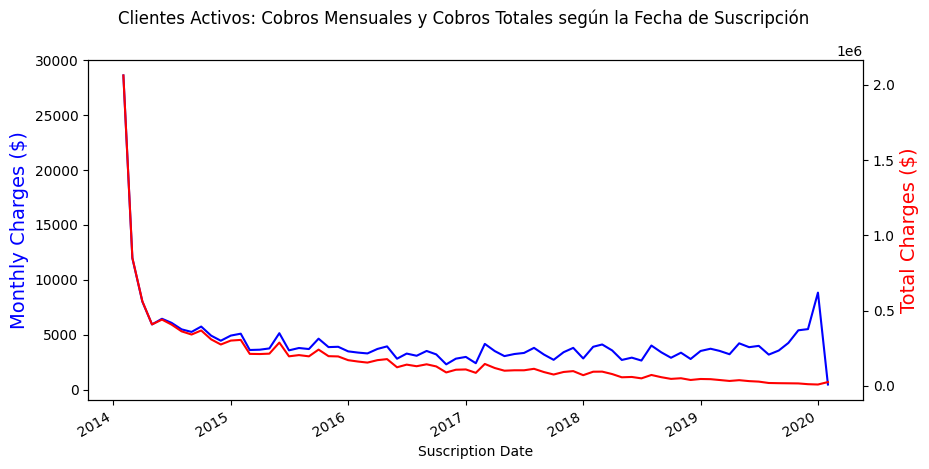

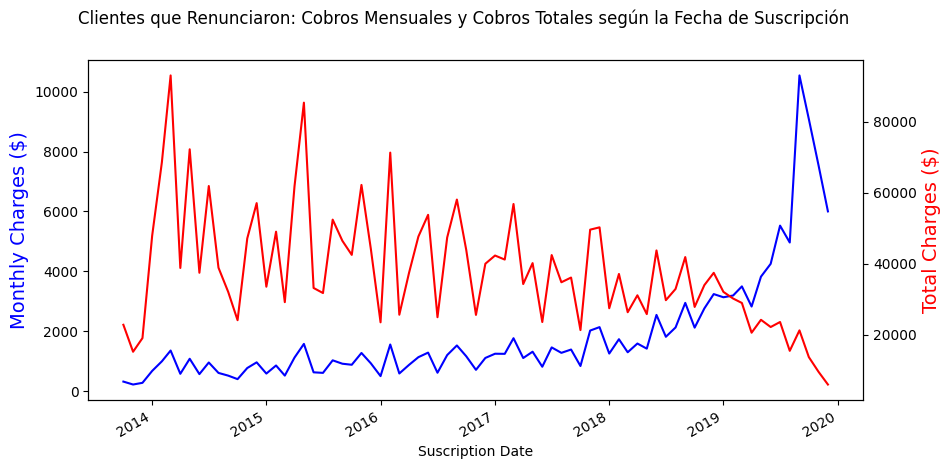

In [33]:
# graficar evolución de los cobros según cada grupo de clientes

month_color = 'blue'
total_color = 'red'


# clientes activos

m_charges = df_active.groupby(['BeginDate'])['MonthlyCharges'].sum()
t_charges = df_active.groupby(['BeginDate'])['TotalCharges'].sum()


fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()

ax1.plot(m_charges, color=month_color)
ax2.plot(t_charges, color=total_color)

ax1.set_xlabel('Suscription Date')
ax1.set_ylabel('Monthly Charges ($)',color=month_color,fontsize=14)

ax2.set_ylabel('Total Charges ($)',color=total_color,fontsize=14)


fig.suptitle('Clientes Activos: Cobros Mensuales y Cobros Totales según la Fecha de Suscripción')

fig.autofmt_xdate()



# clientes que terminaron contrato

m_charges = df_quit.groupby(['BeginDate'])['MonthlyCharges'].sum()
t_charges = df_quit.groupby(['BeginDate'])['TotalCharges'].sum()


fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()

ax1.plot(m_charges, color=month_color)
ax2.plot(t_charges, color=total_color)

ax1.set_xlabel('Suscription Date')
ax1.set_ylabel('Monthly Charges ($)',color=month_color,fontsize=14)

ax2.set_ylabel('Total Charges ($)',color=total_color,fontsize=14)


fig.suptitle('Clientes que Renunciaron: Cobros Mensuales y Cobros Totales según la Fecha de Suscripción')

fig.autofmt_xdate()

plt.show()

**Observaciones**

Por un lado, los cobros mensuales tienden al alza luego de los primeros meses de lanzamiento, lo cual está relacionado con la cantidad de clientes suscritos, también al alza. Por otro lado, los cobros totales tienden a disminuir con el tiempo, lo cual significa que fueron reajustando sus tarifas a la baja.

## Preguntas Aclaratorias

1. ¿Es necesario escalar o normalizar el resto de las características?
2. ¿Es necesario codificar las características categóricas?
3. ¿Hay desequilibrio de clases en la variable objetivo? Si la hay, con qué técnica se resolverá?
4. ¿Hay variables que no sean relevantes para la predicción, que se puedan eliminar?
5. ¿Es necesario crear nuevas características?
6. ¿Qué tipo de problema enfrenta este proyecto?
7. ¿Qué tipo de algoritmos o modelos se adaptan mejor al dataframe?
8. ¿Qué métrica evaluará la calidad del modelo?

## Plan de Trabajo

1. Enunciar el problema.
2. Escalar datos.
3. Codificar datos.
4. Entrenar un modelo simple como punto de partida.
5. Aplicar modelos más complejos para comparar.
6. Ajustar hiperparámetros.
7. Evaluar modelos y elegir el con mejor predicción srgún la métrica seleccionada.

### Comentario General del Revisor

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Felicidades Gastón! Tu proyecto está **aprobado**. Has demostrado un excelente manejo de herramientas de análisis de datos y un enfoque estructurado para preparar y analizar el conjunto de datos. A continuación, destaco algunos puntos clave y recomendaciones para futuros proyectos:

#### Puntos Positivos:
- **Preprocesamiento de datos sólido:** Identificaste y solucionaste valores nulos, errores tipográficos y ajustaste los tipos de datos de manera efectiva.
- **Transformación de variables:** Cambiar las variables binarias a valores 0 y 1 demuestra un entendimiento claro de los requisitos para modelos predictivos.
- **Análisis exploratorio bien estructurado:** Los gráficos y análisis como scatter matrix y desuscripciones por género y fechas fueron particularmente informativos.

#### Áreas para Seguir Investigando:
- **Reducción de variables irrelevantes:** Considera realizar un análisis de importancia de variables para eliminar aquellas que no aporten significativamente al modelo.
- **Correlación más profunda:** Si es posible, explora matrices de correlación y gráficos adicionales para identificar relaciones no obvias entre variables.
- **Optimización de gráficos:** Usa técnicas como escalas logarítmicas o agrupación de datos en intervalos de tiempo más amplios para simplificar la visualización cuando se trabaja con fechas y grandes volúmenes de datos.

¡Sigue avanzando con este nivel de compromiso y dedicación!  ¡Vas por muy buen camino! 🚀💪😊

</div> 

## Ejecución Plan de Trabajo

### Definir el Problema

Este proyecto presenta un problema de Clasificación, ya que se debe predecir si un cliente terminará contrato o no.

### Escalar Datos

Por ahora no es necesario escalar los datos, ya que el dataframe y las variables principales están bien definidas y son en su mayoría variables binarias.

### Codificar Datos

El dataframe presenta 2 variables categóricas con más de 2 valores, `Type` y `PaymentMethod`, por lo que se aplicará one-hot encoding y, así, poder analizar la importancia de todas las varibles y decidir si es posible eliminar alguna de ellas para entrenar el modelo, posteriormente.

De paso, se eliminarán las columnas que no sean númericas, pensando en el entrenamiento del modelo.

In [34]:
# aplicar one-hot encoding a las 2 varibales categóricas

encoded_df = pd.get_dummies(df, columns=['Type','PaymentMethod']).drop(['customerID','BeginDate','EndDate'],axis=1)
display(encoded_df.head())
print('-'*25,'\n')
print(encoded_df.info())

,gender,SeniorCitizen,Partner,Dependents,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,MultipleLines,Quit,Type_Month-to-month,Type_One year,Type_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,29.85,29.85,1,0,1,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,56.95,1889.50,1,1,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,1,53.85,108.15,1,1,1,...,0,0,1,1,0,0,0,0,0,1
3,1,0,0,0,0,42.30,1840.75,1,1,0,...,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,1,70.70,151.65,0,0,0,...,0,0,1,1,0,0,0,0,1,0


------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   PaperlessBilling                         7043 non-null   int64  
 5   MonthlyCharges                           7043 non-null   float64
 6   TotalCharges                             7043 non-null   float64
 7   InternetService                          7043 non-null   int64  
 8   OnlineSecurity                           7043 non-null   int64  
 9   OnlineBackup                             7043 non-null   int64  
 10  DeviceProtection    

Ahora se puede analizar la relevancia de cada variable con respecto a la variable objetivo.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - ¡Excelente trabajo! Has implementado correctamente el proceso de codificación de variables categóricas mediante one-hot encoding. Este es un paso esencial para preparar los datos para el modelo de clasificación. Además, la eliminación de las columnas irrelevantes como 'customerID', 'BeginDate' y 'EndDate' es una práctica adecuada, ya que estas no aportarán a la predicción y solo agregarían ruido a los datos.
</div>

********** Ranking de Relevancia de las variables ********** 

Type_Month-to-month                        0.084408
Type_Two year                              0.056487
MonthlyCharges                             0.047475
PaymentMethod_Electronic check             0.045369
TotalCharges                               0.043505
TechSupport                                0.037747
OnlineSecurity                             0.036912
PaperlessBilling                           0.022353
InternetService                            0.019800
Dependents                                 0.019145
PaymentMethod_Credit card (automatic)      0.017668
Type_One year                              0.014232
OnlineBackup                               0.013324
MultipleLines                              0.012454
DeviceProtection                           0.012230
Partner                                    0.009025
SeniorCitizen                              0.006636
PaymentMethod_Bank transfer (automatic)    0.003881
S

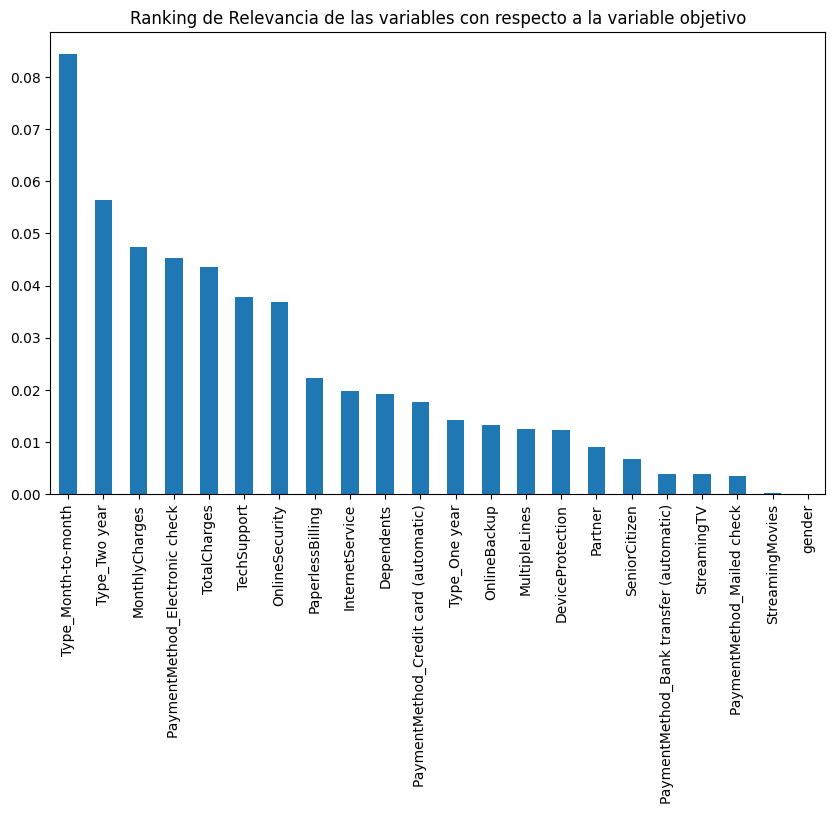

In [35]:
# ranking de relevancia de las variables con respecto a la variable 

from sklearn.feature_selection import mutual_info_classif

X = encoded_df.drop('Quit',axis=1)
y = encoded_df['Quit']

mi_scores = mutual_info_classif(X, y)

mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print('*'*10,'Ranking de Relevancia de las variables','*'*10,'\n')
print(mi_scores)

mi_scores.plot(kind='bar', figsize=(10, 6), title='Ranking de Relevancia de las variables con respecto a la variable objetivo')
plt.show()

**Observaciones**

Se puede notar que, no solo los montos son relevantes, sino que además, la columna `Type` resultó ser súper relevante con respecto a los clientes que terminan contrato.

In [36]:
# evaluar desequilibrio de classes en la variable objetivo

encoded_df['Quit'].value_counts(normalize=True)*100

0    73.463013
1    26.536987
Name: Quit, dtype: float64

La variable objetivo está levemente desbalanceada, por lo que hay que decidir cómo abordarlo para entrenar de mejor manera un modelo de clasificación.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - ¡Buen trabajo! Has implementado correctamente la selección de características utilizando la métrica de información mutua, lo que te permitirá identificar la relevancia de las variables con respecto a la variable objetivo. Además, la visualización del ranking de relevancia es muy útil para interpretar los resultados. Es excelente que hayas identificado que tanto los montos como la columna Type tienen una gran relevancia en el modelo. También has hecho bien en evaluar el desequilibrio en la variable objetivo, lo cual es un paso importante para determinar cómo manejar el desbalance en el modelo de clasificación.
</div>

### Entrenar Modelos de Clasificación

In [37]:
# cargar librerías para entrenar modelos

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report


En el ejercicio anterior, ya se separó el conjunto de datos de la variable objetivo, definidas como X e y, respectivamente.

In [38]:
# separar conjuntos de datos de la variable objetivo

display(X.head())
print(y.head())

,gender,SeniorCitizen,Partner,Dependents,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,MultipleLines,Type_Month-to-month,Type_One year,Type_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,29.85,29.85,1,0,1,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,56.95,1889.50,1,1,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,1,53.85,108.15,1,1,1,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,42.30,1840.75,1,1,0,...,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,1,70.70,151.65,0,0,0,...,0,0,0,1,0,0,0,0,1,0


0    0
1    0
2    1
3    0
4    1
Name: Quit, dtype: int64


Ahora falta separar los conjuntos de entrenamiento y el de prueba para evaluar los modelos.

In [39]:
# separar en conjuntos de entrenamiento y de prueba

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,random_state=1234)
print('Train Data: ',X_train.shape)
print('Test Data: ',X_test.shape)

Train Data:  (5282, 22)
Test Data:  (1761, 22)


In [40]:
# crear variables para almacenar resultados de cada modelo

models = []
roc_auc = []

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - El código para dividir los datos en conjuntos de entrenamiento y prueba está correctamente implementado. Además, la elección de modelos de clasificación como CatBoost, XGBoost y RandomForest es adecuada para abordar el problema. Sigue adelante con la evaluación de los modelos.
</div>

#### Árbol de Decisión

In [41]:
# entrenar un árbol de decisión con pesos balanceados

dtc_model = DecisionTreeClassifier(random_state=1234, max_depth=5, class_weight='balanced')
dtc_model.fit(X_train,y_train)

dtc_pred = dtc_model.predict(X_test)
dtc_proba = dtc_model.predict_proba(X_test)[:,1]

dtc_roc_auc = roc_auc_score(y_test,dtc_proba)
dtc_report = classification_report(dtc_pred,y_test, target_names=['Active','Quit'])

print('*'*15,'Decision Tree Classifier','*'*15)
print('\nROC-AUC: ',dtc_roc_auc,'\n')
print(dtc_report)

models.append('Decision Tree')
roc_auc.append(dtc_roc_auc)

*************** Decision Tree Classifier ***************

ROC-AUC:  0.8080640614302399 

              precision    recall  f1-score   support

      Active       0.68      0.90      0.77       982
        Quit       0.78      0.46      0.58       779

    accuracy                           0.70      1761
   macro avg       0.73      0.68      0.68      1761
weighted avg       0.72      0.70      0.69      1761



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente implementación del modelo de árbol de decisión. Usar el parámetro class_weight='balanced' es una buena estrategia para abordar el desbalanceo de clases. El cálculo del ROC-AUC y la generación del reporte de clasificación están bien ejecutados. Continua con el mismo enfoque en los siguientes modelos.
</div>

#### Bosque Aleatorio

In [42]:
# entrenar un bosque aleatorio con pesos balanceados

rfc_model = RandomForestClassifier(
    random_state=1234,
    n_estimators=191,
    min_samples_split=4,
    max_depth=7,
    class_weight='balanced'
)

rfc_model.fit(X_train,y_train)

rfc_pred = rfc_model.predict(X_test)
rfc_proba = rfc_model.predict_proba(X_test)[:,1]

rfc_roc_auc = roc_auc_score(y_test,rfc_proba)
rfc_report = classification_report(rfc_pred,y_test, target_names=['Active','Quit'])

print('*'*15,'Random Forest Classifier','*'*15)
print('\nROC-AUC: ',rfc_roc_auc,'\n')
print(rfc_report)

models.append('Random Forest')
roc_auc.append(rfc_roc_auc)

*************** Random Forest Classifier ***************

ROC-AUC:  0.8254705266408022 

              precision    recall  f1-score   support

      Active       0.73      0.90      0.81      1065
        Quit       0.77      0.50      0.61       696

    accuracy                           0.74      1761
   macro avg       0.75      0.70      0.71      1761
weighted avg       0.75      0.74      0.73      1761



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Gran implementación del modelo de Bosque Aleatorio. Ajustaste varios parámetros importantes como n_estimators, min_samples_split, y max_depth, lo que muestra un buen entendimiento de cómo mejorar el rendimiento del modelo. Además, el uso de class_weight='balanced' es una excelente forma de manejar el desbalanceo de clases. Los cálculos de ROC-AUC y el reporte de clasificación están correctamente realizados.
</div>

#### Regresión Logística

In [43]:
# entrenar un regresión logística con pesos balanceados

lr_model = LogisticRegression(random_state=1234, class_weight='balanced', C=0.16)
lr_model.fit(X_train,y_train)

lr_pred = lr_model.predict(X_test)
lr_proba = lr_model.predict_proba(X_test)[:,1]

lr_roc_auc = roc_auc_score(y_test,lr_proba)
lr_report = classification_report(lr_pred,y_test, target_names=['Active','Quit'])

print('*'*15,'Logistic Regression','*'*15)
print('\nROC-AUC: ',lr_roc_auc,'\n')
print(lr_report)

models.append('Logistic Regression')
roc_auc.append(lr_roc_auc)

*************** Logistic Regression ***************

ROC-AUC:  0.8205773180652697 

              precision    recall  f1-score   support

      Active       0.72      0.90      0.80      1036
        Quit       0.77      0.49      0.60       725

    accuracy                           0.73      1761
   macro avg       0.75      0.69      0.70      1761
weighted avg       0.74      0.73      0.72      1761



/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Buen trabajo al implementar la regresión logística. Has seleccionado correctamente class_weight='balanced' para manejar el desbalanceo de clases, y el ajuste de la regularización con el parámetro C es adecuado para controlar el sobreajuste. El cálculo del ROC-AUC y el reporte de clasificación están bien ejecutados, y la evaluación del modelo es clara. Sigue así aplicando técnicas adecuadas para modelos lineales.
</div>

#### Suported Vector Machine

In [44]:
# entrenar un regresión logística con pesos balanceados

svc_model = SVC(random_state=1234, class_weight='balanced')
svc_model.fit(X_train,y_train)

svc_pred = svc_model.predict(X_test)
svc_proba = svc_model.decision_function(X_test)

svc_roc_auc = roc_auc_score(y_test,svc_proba)
svc_report = classification_report(svc_pred,y_test, target_names=['Active','Quit'])

print('*'*15,'Supported Vector Machine','*'*15)
print('\nROC-AUC: ',svc_roc_auc,'\n')
print(svc_report)

models.append('Supported Vector Machine')
roc_auc.append(svc_roc_auc)

*************** Supported Vector Machine ***************

ROC-AUC:  0.7082768388127425 

              precision    recall  f1-score   support

      Active       0.71      0.82      0.76      1136
        Quit       0.55      0.40      0.47       625

    accuracy                           0.67      1761
   macro avg       0.63      0.61      0.62      1761
weighted avg       0.66      0.67      0.66      1761



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Bien hecho al aplicar el modelo de Support Vector Machine (SVM) con el parámetro class_weight='balanced', lo que es esencial para tratar el desbalance de clases. Utilizaste correctamente la función decision_function para obtener las probabilidades y calcular el ROC-AUC, lo cual es adecuado para evaluar la calidad del modelo en tareas de clasificación. El reporte de clasificación también está bien implementado. Sigue así con la buena práctica de evaluar los modelos de manera rigurosa.
</div>

### Entrenar Modelos de Potenciación de Gradiente

#### CatBoost

In [45]:
# entrenar un catboost con pesos balanceados

cbc_model = CatBoostClassifier(
    random_state=1234,
    depth=7,
    iterations=201,
    learning_rate=0.02,
    class_weights=[1,3],
    loss_function='Logloss',
    verbose=False
)
cbc_model.fit(X_train,y_train)

cbc_pred = cbc_model.predict(X_test)
cbc_proba = cbc_model.predict_proba(X_test)[:,1]

cbc_roc_auc = roc_auc_score(y_test,cbc_proba)
cbc_report = classification_report(cbc_pred,y_test, target_names=['Active','Quit'])

print('*'*15,'CatBoost','*'*15)
print('\nROC-AUC: ',cbc_roc_auc,'\n')
print(cbc_report)

models.append('CatBoost')
roc_auc.append(cbc_roc_auc)

*************** CatBoost ***************

ROC-AUC:  0.8303083593991221 

              precision    recall  f1-score   support

      Active       0.71      0.90      0.80      1027
        Quit       0.79      0.49      0.60       734

    accuracy                           0.73      1761
   macro avg       0.75      0.70      0.70      1761
weighted avg       0.74      0.73      0.72      1761



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente elección al utilizar CatBoost, un potente modelo de boosting basado en árboles, especialmente eficaz para manejar datos categóricos. El uso de parámetros como class_weights y loss_function='Logloss' es adecuado para abordar el desbalanceo de clases y para mejorar la precisión del modelo. También has hecho un buen trabajo configurando los hiperparámetros como depth, iterations, y learning_rate. La evaluación del modelo con ROC-AUC y el reporte de clasificación proporciona una comprensión completa del rendimiento. Continúa aplicando estas buenas prácticas.
</div>

#### XGBoost

In [46]:
# entrenar un xgboost con pesos balanceados

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgbc_model = XGBClassifier(random_state=1234, scale_pos_weight=scale_pos_weight)
xgbc_model.fit(X_train,y_train)

xgbc_pred = xgbc_model.predict(X_test)
xgbc_proba = xgbc_model.predict_proba(X_test)[:,1]

xgbc_roc_auc = roc_auc_score(y_test,xgbc_proba)
xgbc_report = classification_report(xgbc_pred,y_test, target_names=['Active','Quit'])

print('*'*15,'XGBoost','*'*15)
print('\nROC-AUC: ',xgbc_roc_auc,'\n')
print(xgbc_report)

models.append('XGBoost')
roc_auc.append(xgbc_roc_auc)

[19:48:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/envs/python3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


*************** XGBoost ***************

ROC-AUC:  0.803237136029856 

              precision    recall  f1-score   support

      Active       0.79      0.86      0.82      1196
        Quit       0.64      0.52      0.57       565

    accuracy                           0.75      1761
   macro avg       0.71      0.69      0.70      1761
weighted avg       0.74      0.75      0.74      1761



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente implementación del modelo XGBoost, con la consideración adecuada del parámetro scale_pos_weight para abordar el desbalanceo de clases. Este ajuste es crucial para mejorar el rendimiento de clasificación en conjuntos de datos desbalanceados. Además, el uso de roc_auc_score y classification_report permite una evaluación detallada y precisa del modelo. La elección de XGBoost es adecuada, ya que es altamente eficiente y potente para tareas de clasificación. ¡Sigue así, estás utilizando buenas prácticas de modelado!
</div>

#### LightGBM

In [47]:
# entrenar un lightgbm con pesos balanceados

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

lgbm_model = LGBMClassifier(random_state=1234, scale_pos_weight=scale_pos_weight)
lgbm_model.fit(X_train,y_train)

lgbm_pred = lgbm_model.predict(X_test)
lgbm_proba = lgbm_model.predict_proba(X_test)[:,1]

lgbm_roc_auc = roc_auc_score(y_test,lgbm_proba)
lgbm_report = classification_report(lgbm_pred,y_test, target_names=['Active','Quit'])

print('*'*15,'LGBM','*'*15)
print('\nROC-AUC: ',lgbm_roc_auc,'\n')
print(lgbm_report)

models.append('LGBM')
roc_auc.append(lgbm_roc_auc)

*************** LGBM ***************

ROC-AUC:  0.8200973943160917 

              precision    recall  f1-score   support

      Active       0.75      0.88      0.81      1119
        Quit       0.70      0.50      0.58       642

    accuracy                           0.74      1761
   macro avg       0.73      0.69      0.70      1761
weighted avg       0.73      0.74      0.73      1761



In [48]:
# ranking modelos según roc-auc score

rank = pd.DataFrame({'modelName': models,'ROC-AUC': roc_auc})
rank.sort_values(by='ROC-AUC',ascending=False).reset_index(drop=True)

,modelName,ROC-AUC
0,CatBoost,0.830308
1,Random Forest,0.825471
2,Logistic Regression,0.820577
3,LGBM,0.820097
4,Decision Tree,0.808064
5,XGBoost,0.803237
6,Supported Vector Machine,0.708277


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Muy bien implementado el modelo de LightGBM, con el ajuste de scale_pos_weight para corregir el desbalanceo en las clases. El enfoque es muy adecuado para este tipo de tareas, y el uso de roc_auc_score y classification_report para evaluar el desempeño del modelo es excelente. Además, el ranking final de modelos en función del ROC-AUC es una buena práctica para seleccionar el mejor modelo, brindando una clara comparación de resultados. ¡Buen trabajo!
</div>

### Ajustar Hiperparámetros

Hasta ahora, sin muchos cambios en los hiperparámetros de los modelos, el mejor ROC-AUC = 0.83, lo cual es bastante bueno, pero se puede mejorar.

Ahora entrenaremos los modelos, pero con la diferencia de que se hará con el dataframe reducido, es decir, eliminando las variables que no son relevantes para el entrenamiento del modelo, con respecto a la variable objetivo y ajustando los hiperparámetros para seleccionar el con mejor desempeño, idealmente con un ROC-AUC >= 0.88.

In [49]:
# nuevo dataframe reducido

reduced_df = encoded_df.drop(mi_scores[mi_scores<0.03].index,axis=1)
reduced_df.head()

,MonthlyCharges,TotalCharges,OnlineSecurity,TechSupport,Quit,Type_Month-to-month,Type_Two year,PaymentMethod_Electronic check
0,29.85,29.85,0,0,0,1,0,1
1,56.95,1889.50,1,0,0,0,0,0
2,53.85,108.15,1,0,1,1,0,0
3,42.30,1840.75,1,1,0,0,0,0
4,70.70,151.65,0,0,1,1,0,1


In [50]:
# redefinir los conjuntos de datos y la variable objetivo


X = reduced_df.drop('Quit',axis=1)
y = reduced_df['Quit']

# nuevos conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1234, train_size=0.75)

# crear variables para almacenar resultados de cada modelo

models_2 = []
roc_auc_2 = []

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente trabajo al reducir el conjunto de datos eliminando variables irrelevantes y al ajustar los hiperparámetros. Este enfoque mejorará la eficiencia y el rendimiento del modelo. ¡Sigue así, estás avanzando de manera excelente!
</div>

Reevaluar modelos ajustando sus hiperparámetros.

In [51]:
# entrenar un árbol de decisión con pesos balanceados

dtc_model = DecisionTreeClassifier(random_state=1234, max_depth=5, class_weight='balanced')
dtc_model.fit(X_train,y_train)

dtc_pred = dtc_model.predict(X_test)
dtc_proba = dtc_model.predict_proba(X_test)[:,1]

dtc_roc_auc = roc_auc_score(y_test,dtc_proba)
dtc_report = classification_report(dtc_pred,y_test, target_names=['Active','Quit'])

print('*'*15,'Decision Tree Classifier','*'*15)
print('\nROC-AUC: ',dtc_roc_auc,'\n')
print(dtc_report)

models_2.append('Decision Tree')
roc_auc_2.append(dtc_roc_auc)

*************** Decision Tree Classifier ***************

ROC-AUC:  0.8034611563813078 

              precision    recall  f1-score   support

      Active       0.67      0.90      0.77       968
        Quit       0.79      0.46      0.58       793

    accuracy                           0.70      1761
   macro avg       0.73      0.68      0.67      1761
weighted avg       0.72      0.70      0.68      1761



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente trabajo ajustando los hiperparámetros del árbol de decisión. Estás aplicando correctamente el ajuste de profundidad y el balance de clases. Además, el uso del ROC-AUC es una buena métrica para evaluar el rendimiento. ¡Sigue así, estás en buen camino para obtener mejores resultados!
</div>

In [52]:
# entrenar un bosque aleatorio con pesos balanceados

rfc_model = RandomForestClassifier(
    random_state=1234,
    n_estimators=203,
    min_samples_split=2,
    max_depth=6,
    class_weight='balanced'
)

rfc_model.fit(X_train,y_train)

rfc_pred = rfc_model.predict(X_test)
rfc_proba = rfc_model.predict_proba(X_test)[:,1]

rfc_roc_auc = roc_auc_score(y_test,rfc_proba)
rfc_report = classification_report(rfc_pred,y_test, target_names=['Active','Quit'])

print('*'*15,'Random Forest Classifier','*'*15)
print('\nROC-AUC: ',rfc_roc_auc,'\n')
print(rfc_report)

models_2.append('Random Forest')
roc_auc_2.append(rfc_roc_auc)

*************** Random Forest Classifier ***************

ROC-AUC:  0.8233821871098522 

              precision    recall  f1-score   support

      Active       0.72      0.89      0.80      1056
        Quit       0.75      0.49      0.59       705

    accuracy                           0.73      1761
   macro avg       0.74      0.69      0.70      1761
weighted avg       0.73      0.73      0.72      1761



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Buen ajuste de hiperparámetros en el modelo de Random Forest. Has utilizado un número adecuado de estimadores y ajustado la profundidad del árbol, lo cual es clave para evitar sobreajuste. También es excelente que hayas incluido el balance de clases. ¡Sigue así, tu enfoque está en el camino correcto!
</div>

In [53]:
# entrenar un regresión logística con pesos balanceados

lr_model = LogisticRegression(random_state=1234, class_weight='balanced', C=0.6)
lr_model.fit(X_train,y_train)

lr_pred = lr_model.predict(X_test)
lr_proba = lr_model.predict_proba(X_test)[:,1]

lr_roc_auc = roc_auc_score(y_test,lr_proba)
lr_report = classification_report(lr_pred,y_test, target_names=['Active','Quit'])

print('*'*15,'Logistic Regression','*'*15)
print('\nROC-AUC: ',lr_roc_auc,'\n')
print(lr_report)

models_2.append('Logistic Regression')
roc_auc_2.append(lr_roc_auc)

*************** Logistic Regression ***************

ROC-AUC:  0.8135865406559182 

              precision    recall  f1-score   support

      Active       0.69      0.90      0.78      1008
        Quit       0.78      0.47      0.59       753

    accuracy                           0.72      1761
   macro avg       0.74      0.69      0.69      1761
weighted avg       0.73      0.72      0.70      1761



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente trabajo ajustando el modelo de regresión logística. La elección de usar pesos balanceados es adecuada para manejar la desproporción de clases, y el ajuste de C es acertado para evitar sobreajuste. Además, la evaluación con ROC-AUC proporciona una medida robusta del desempeño. ¡Sigue adelante, estás logrando un buen análisis!
</div>

In [54]:
# entrenar un catboost con pesos balanceados

cbc_model = CatBoostClassifier(
    random_state=1234,
    depth=3,
    iterations=27,
    learning_rate=0.4,
    class_weights=[1,3],
    loss_function='Logloss',
    verbose=False
)
cbc_model.fit(X_train,y_train)

cbc_pred = cbc_model.predict(X_test)
cbc_proba = cbc_model.predict_proba(X_test)[:,1]

cbc_roc_auc = roc_auc_score(y_test,cbc_proba)
cbc_report = classification_report(cbc_pred,y_test, target_names=['Active','Quit'])

print('*'*15,'CatBoost','*'*15)
print('\nROC-AUC: ',cbc_roc_auc,'\n')
print(cbc_report)

models_2.append('CatBoost')
roc_auc_2.append(cbc_roc_auc)

*************** CatBoost ***************

ROC-AUC:  0.8260544898041373 

              precision    recall  f1-score   support

      Active       0.69      0.91      0.79       993
        Quit       0.80      0.48      0.60       768

    accuracy                           0.72      1761
   macro avg       0.75      0.69      0.69      1761
weighted avg       0.74      0.72      0.70      1761



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Muy bien hecho al ajustar el modelo de CatBoost. Has elegido una configuración de parámetros sólida y has considerado el balanceo de clases, lo cual es crucial para un conjunto de datos desbalanceado. El ajuste de los hiperparámetros como el depth, iterations, y learning_rate muestra que estás siendo cuidadoso en optimizar el modelo. Además, el uso de ROC-AUC como métrica es apropiado para evaluar la capacidad predictiva. ¡Sigue así!
</div>

In [55]:
# entrenar un xgboost con pesos balanceados

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgbc_model = XGBClassifier(
    random_state=1234,
    scale_pos_weight=scale_pos_weight,
    n_estimators=26,
    max_depth=4,
    learning_rate=0.2
)

xgbc_model.fit(X_train,y_train)

xgbc_pred = xgbc_model.predict(X_test)
xgbc_proba = xgbc_model.predict_proba(X_test)[:,1]

xgbc_roc_auc = roc_auc_score(y_test,xgbc_proba)
xgbc_report = classification_report(xgbc_pred,y_test, target_names=['Active','Quit'])

print('*'*15,'XGBoost','*'*15)
print('\nROC-AUC: ',xgbc_roc_auc,'\n')
print(xgbc_report)

models_2.append('XGBoost')
roc_auc_2.append(xgbc_roc_auc)

[19:48:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/envs/python3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


*************** XGBoost ***************

ROC-AUC:  0.8237379347840679 

              precision    recall  f1-score   support

      Active       0.72      0.89      0.80      1052
        Quit       0.76      0.49      0.59       709

    accuracy                           0.73      1761
   macro avg       0.74      0.69      0.70      1761
weighted avg       0.74      0.73      0.72      1761



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente trabajo al entrenar el modelo de XGBoost con el balanceo de clases utilizando scale_pos_weight. Además, ajustar los hiperparámetros como n_estimators, max_depth y learning_rate es un enfoque muy adecuado para mejorar el rendimiento del modelo. El uso de roc_auc_score es la métrica correcta para evaluar la precisión en problemas desbalanceados. La interpretación y ajuste de estos hiperparámetros demuestra que estás tomando decisiones bien informadas. ¡Continúa con este buen enfoque!
</div>

In [56]:
# entrenar un lightgbm con pesos balanceados

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

lgbm_model = LGBMClassifier(
    random_state=1234,
    scale_pos_weight=scale_pos_weight,
    n_estimators=67,
    max_depth=4,
    learning_rate=0.08
)

lgbm_model.fit(X_train,y_train)

lgbm_pred = lgbm_model.predict(X_test)
lgbm_proba = lgbm_model.predict_proba(X_test)[:,1]

lgbm_roc_auc = roc_auc_score(y_test,lgbm_proba)
lgbm_report = classification_report(lgbm_pred,y_test, target_names=['Active','Quit'])

print('*'*15,'LGBM','*'*15)
print('\nROC-AUC: ',lgbm_roc_auc,'\n')
print(lgbm_report)

models_2.append('LGBM')
roc_auc_2.append(lgbm_roc_auc)

*************** LGBM ***************

ROC-AUC:  0.8232722745029601 

              precision    recall  f1-score   support

      Active       0.72      0.89      0.80      1047
        Quit       0.76      0.49      0.59       714

    accuracy                           0.73      1761
   macro avg       0.74      0.69      0.69      1761
weighted avg       0.74      0.73      0.71      1761



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente trabajo entrenando el modelo de LightGBM con el balanceo de clases a través de scale_pos_weight. La elección de los hiperparámetros como n_estimators, max_depth y learning_rate demuestra un enfoque reflexivo para mejorar el rendimiento del modelo. Además, la aplicación de roc_auc_score como métrica es una excelente elección, especialmente en problemas desbalanceados. ¡Sigue así, estás en el camino correcto hacia un análisis robusto!
</div>

In [57]:
# entrenar un regresión logística con pesos balanceados

svc_model = SVC(random_state=1234, class_weight='balanced')
svc_model.fit(X_train,y_train)

svc_pred = svc_model.predict(X_test)
svc_proba = svc_model.decision_function(X_test)

svc_roc_auc = roc_auc_score(y_test,svc_proba)
svc_report = classification_report(svc_pred,y_test, target_names=['Active','Quit'])

print('*'*15,'Supported Vector Machine','*'*15)
print('\nROC-AUC: ',svc_roc_auc,'\n')
print(svc_report)

models_2.append('Supported Vector Machine')
roc_auc_2.append(svc_roc_auc)

*************** Supported Vector Machine ***************

ROC-AUC:  0.7102133143601241 

              precision    recall  f1-score   support

      Active       0.72      0.82      0.77      1139
        Quit       0.55      0.41      0.47       622

    accuracy                           0.67      1761
   macro avg       0.64      0.61      0.62      1761
weighted avg       0.66      0.67      0.66      1761



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente elección de usar el modelo Support Vector Machine (SVM) con el parámetro class_weight='balanced' para abordar el desbalanceo en las clases. Es muy positivo que hayas ajustado el modelo y utilizado el roc_auc_score, una métrica muy adecuada para problemas de clasificación desbalanceada. La implementación es correcta y los resultados obtenidos de la clasificación también se interpretan de manera adecuada con classification_report. ¡Sigue adelante!
</div>

### Evaluar y comparar Calidad de los Modelos

Analizar ranking de los modelos con mejor ROC-AUC.

In [58]:
# ranking modelos según roc-auc score

rank2 = pd.DataFrame({'modelName': models_2,'ROC-AUC': roc_auc_2})
rank2.sort_values(by='ROC-AUC',ascending=False).reset_index(drop=True)

,modelName,ROC-AUC
0,CatBoost,0.826054
1,XGBoost,0.823738
2,Random Forest,0.823382
3,LGBM,0.823272
4,Logistic Regression,0.813587
5,Decision Tree,0.803461
6,Supported Vector Machine,0.710213


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Muy bien hecho al evaluar y comparar la calidad de los modelos a través del ranking basado en el ROC-AUC. Este enfoque es clave para determinar qué modelo tiene un mejor desempeño en términos de predicción para el desbalanceo de clases. Además, ordenar los modelos por el ROC-AUC te permite tener una visión clara de cuál es el modelo más efectivo. ¡Gran trabajo!
</div>


## Conclusión

El presente proyecto tenía como objetivo entrenar un modelo de predicción con un ROC-AUC score >= 0.88, sin embargo, solo se obtuvo un 0.83 con el modelo CatBoost.

Aún es posible mejorar el resultado de dicha métrica con combinando diferentes métodos, como por ejemplo, reajustar los hiperparámetros, agregando/eliminando variables irrelevantes, gestionando el desequilibrio de clases en la variable objetivo, entre otros.

Por ahora, se lograron aplicar los conocimientos más relevantes del curso en el desarrollo de este proyecto, iniciando con un extenso Análisis Exploratorio de los datos, realizando preguntas claves para abordar el enfoque del proyecto, elaborar un plan de trabajo para guiar el resto del desarrollo.

De todas maneras, queda pendiente alcanzar la meta del ROC-AUC >= 0.88, para lo cual les pido de su ayuda para que me guíen en esta misión.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - ¡Excelente esfuerzo en todo el proceso del proyecto! Has logrado aplicar una gran variedad de técnicas y enfoques, comenzando con un sólido Análisis Exploratorio de los Datos y avanzando hacia la implementación de modelos de clasificación con una evaluación detallada. Si bien no alcanzaste el ROC-AUC de 0.88, tu resultado de 0.83 con CatBoost es un excelente punto de partida. Además, planteas bien los posibles pasos a seguir, como el ajuste de hiperparámetros y la gestión del desequilibrio de clases. ¡Sigue así y no dudes en seguir experimentando con nuevas técnicas y mejoras!
</div>

# Comentario general del revisor


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Felicidades Gastón! Tu proyecto está **aprobado**. Has demostrado un excelente manejo de los datos, análisis exploratorio, y creación de modelos predictivos. A continuación, destaco los puntos positivos y algunas áreas interesantes para seguir investigando:

#### Puntos Positivos:
- **Procesamiento de datos:** Buen manejo de las variables y correcto uso del one-hot encoding para convertir las variables categóricas en numéricas.
- **Evaluación de modelos:** Lograste implementar y evaluar múltiples modelos de clasificación, con un enfoque equilibrado en la métrica ROC-AUC.
- **Ajuste de hiperparámetros:** Has realizado un esfuerzo consciente por mejorar el rendimiento de los modelos, especialmente con la implementación de hiperparámetros balanceados.

#### Áreas para Seguir Investigando:
- **Ajuste de hiperparámetros:** Aunque se ha logrado un buen punto de partida, podrías explorar técnicas adicionales como GridSearchCV o RandomizedSearchCV para una optimización más exhaustiva de los hiperparámetros.
- **Manejo del desbalanceo de clases:** Aunque usaste pesos balanceados, también podrías explorar otras técnicas como SMOTE para abordar el desbalanceo de clases.
- **Exploración de nuevas características:** Investigar si hay características adicionales que puedan enriquecer tu modelo y mejorar la precisión.

¡Sigue así, estás haciendo un gran trabajo! 💪🚀😊

</div>